In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist
# Ładowanie danych MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizacja danych do zakresu 0-1
x_train, x_test = x_train / 255.0, x_test / 255.0

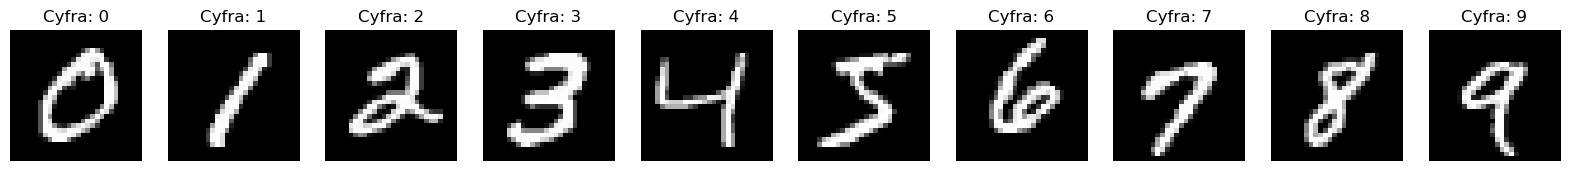

In [3]:
# Wyświetlenie po jednym przykładzie obrazu dla każdej cyfry
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for digit in range(10):
    index = np.where(y_train == digit)[0][0]
    axes[digit].imshow(x_train[index], cmap='gray')
    axes[digit].set_title(f'Cyfra: {digit}')
    axes[digit].axis('off')
plt.show()

In [4]:
# Podział danych treningowych na treningowe i walidacyjne
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f'Rozmiar zbioru treningowego: {x_train.shape[0]}')
print(f'Rozmiar zbioru walidacyjnego: {x_val.shape[0]}')
print(f'Rozmiar zbioru testowego: {x_test.shape[0]}')

Rozmiar zbioru treningowego: 48000
Rozmiar zbioru walidacyjnego: 12000
Rozmiar zbioru testowego: 10000


In [5]:
# Konwersja danych treningowych, walidacyjnych i testowych na obiekty Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Określenie rozmiaru batcha
batch_size = 32

# Shuffle, batch i prefetch dla zbioru treningowego
train_dataset = train_dataset.shuffle(len(x_train)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Batch i prefetch dla zbiorów walidacyjnego i testowego (shuffling nie jest potrzebne)
val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [ ]:
# from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l1_l2

num_classes = 10  # MNIST ma 10 klas: cyfry od 0 do 9

# MNIST images are 28x28 pixels and grayscale (1 channel)
IMG_SIZE = 28
CHANNELS = 1  # Czarno-biały obraz, więc tylko 1 kanał

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, CHANNELS), kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    Dropout(0.5),  # Utrzymanie zwiększonego dropoutu do modelu MNIST
    Dense(num_classes, activation='softmax')
])

model.summary()

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Callbacks
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=4, verbose=1, restore_best_weights=True, mode='min')

checkpoint_cb = ModelCheckpoint(
    'model_v1',
    save_best_only=True,
    monitor='val_loss',
    mode='min'
)

epochs = 20

history = model.fit(
    train_dataset, 
    epochs=epochs, 
    validation_data=val_dataset,
    callbacks=[checkpoint_cb, early_stopping_callback]  # Dodanie wczesnego zatrzymania
)

Epoch 1/20
1495/1500 [============================>.] - ETA: 0s - loss: 0.3539 - accuracy: 0.9110

INFO:tensorflow:Assets written to: model_v1\assets


INFO:tensorflow:Assets written to: model_v1\assets


1500/1500 [==============================] - 14s 6ms/step - loss: 0.3535 - accuracy: 0.9111 - val_loss: 0.1276 - val_accuracy: 0.9804
Epoch 2/20
1500/1500 [==============================] - ETA: 0s - loss: 0.1598 - accuracy: 0.9732

INFO:tensorflow:Assets written to: model_v1\assets


INFO:tensorflow:Assets written to: model_v1\assets


1500/1500 [==============================] - 8s 6ms/step - loss: 0.1598 - accuracy: 0.9732 - val_loss: 0.1160 - val_accuracy: 0.9865
Epoch 3/20
1496/1500 [============================>.] - ETA: 0s - loss: 0.1364 - accuracy: 0.9806

INFO:tensorflow:Assets written to: model_v1\assets


INFO:tensorflow:Assets written to: model_v1\assets


1500/1500 [==============================] - 8s 5ms/step - loss: 0.1363 - accuracy: 0.9806 - val_loss: 0.1116 - val_accuracy: 0.9875
Epoch 4/20
1494/1500 [============================>.] - ETA: 0s - loss: 0.1262 - accuracy: 0.9830

INFO:tensorflow:Assets written to: model_v1\assets


INFO:tensorflow:Assets written to: model_v1\assets


1500/1500 [==============================] - 8s 5ms/step - loss: 0.1260 - accuracy: 0.9830 - val_loss: 0.1109 - val_accuracy: 0.9872
Epoch 5/20
1492/1500 [============================>.] - ETA: 0s - loss: 0.1162 - accuracy: 0.9855

INFO:tensorflow:Assets written to: model_v1\assets


INFO:tensorflow:Assets written to: model_v1\assets


1500/1500 [==============================] - 8s 5ms/step - loss: 0.1163 - accuracy: 0.9855 - val_loss: 0.1037 - val_accuracy: 0.9889
Epoch 6/20
1499/1500 [============================>.] - ETA: 0s - loss: 0.1105 - accuracy: 0.9865

INFO:tensorflow:Assets written to: model_v1\assets


INFO:tensorflow:Assets written to: model_v1\assets


1500/1500 [==============================] - 8s 5ms/step - loss: 0.1105 - accuracy: 0.9865 - val_loss: 0.1022 - val_accuracy: 0.9882
Epoch 7/20
1499/1500 [============================>.] - ETA: 0s - loss: 0.1054 - accuracy: 0.9872

INFO:tensorflow:Assets written to: model_v1\assets


INFO:tensorflow:Assets written to: model_v1\assets


1500/1500 [==============================] - 8s 5ms/step - loss: 0.1054 - accuracy: 0.9872 - val_loss: 0.0989 - val_accuracy: 0.9888
Epoch 8/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1005 - accuracy: 0.9883 - val_loss: 0.1085 - val_accuracy: 0.9876
Epoch 9/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0950 - accuracy: 0.9893 - val_loss: 0.1014 - val_accuracy: 0.9868
Epoch 10/20
1494/1500 [============================>.] - ETA: 0s - loss: 0.0912 - accuracy: 0.9895

INFO:tensorflow:Assets written to: model_v1\assets


INFO:tensorflow:Assets written to: model_v1\assets


1500/1500 [==============================] - 8s 6ms/step - loss: 0.0913 - accuracy: 0.9895 - val_loss: 0.0937 - val_accuracy: 0.9893
Epoch 11/20
1498/1500 [============================>.] - ETA: 0s - loss: 0.0889 - accuracy: 0.9908

INFO:tensorflow:Assets written to: model_v1\assets


INFO:tensorflow:Assets written to: model_v1\assets


1500/1500 [==============================] - 8s 5ms/step - loss: 0.0889 - accuracy: 0.9908 - val_loss: 0.0910 - val_accuracy: 0.9896
Epoch 12/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0856 - accuracy: 0.9905 - val_loss: 0.0999 - val_accuracy: 0.9866
Epoch 13/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0837 - accuracy: 0.9904 - val_loss: 0.0937 - val_accuracy: 0.9894
Epoch 14/20
1496/1500 [============================>.] - ETA: 0s - loss: 0.0818 - accuracy: 0.9912

INFO:tensorflow:Assets written to: model_v1\assets


INFO:tensorflow:Assets written to: model_v1\assets


1500/1500 [==============================] - 8s 6ms/step - loss: 0.0818 - accuracy: 0.9912 - val_loss: 0.0866 - val_accuracy: 0.9906
Epoch 15/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0783 - accuracy: 0.9915 - val_loss: 0.0916 - val_accuracy: 0.9887
Epoch 16/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0778 - accuracy: 0.9913 - val_loss: 0.0918 - val_accuracy: 0.9902
Epoch 17/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0770 - accuracy: 0.9915 - val_loss: 0.0922 - val_accuracy: 0.9885
Epoch 18/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0748 - accuracy: 0.9924 - val_loss: 0.0886 - val_accuracy: 0.9895
Epoch 18: early stopping


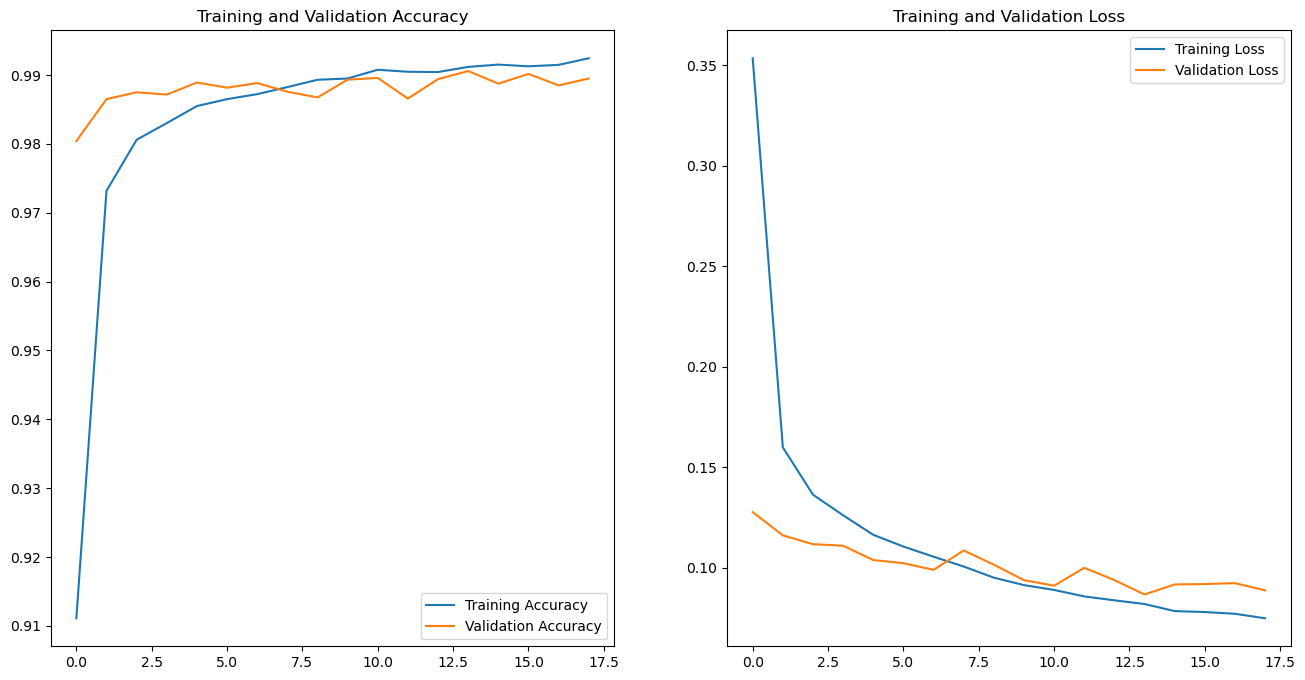

In [13]:
from helper_functions import plot_training_history_class
plot_training_history_class(history)

In [14]:
model.evaluate(val_dataset)

375/375 [==============================] - 1s 3ms/step - loss: 0.0866 - accuracy: 0.9906


[0.08660425990819931, 0.9905833601951599]

In [15]:
model.evaluate(test_dataset)

313/313 [==============================] - 1s 3ms/step - loss: 0.0765 - accuracy: 0.9919


[0.07653079181909561, 0.9919000267982483]

In [16]:
from tensorflow.keras.models import load_model

# Wczytanie najlepszego modelu
best_model = load_model('model_v1')

In [17]:
best_model.evaluate(test_dataset)

313/313 [==============================] - 1s 3ms/step - loss: 0.0765 - accuracy: 0.9919


[0.07653079181909561, 0.9919000267982483]

In [20]:
y_pred_probs = best_model.predict(test_dataset)
y_true = np.concatenate([y for x, y in test_dataset], axis=0)
y_pred = np.argmax(y_pred_probs, axis=1)
n_classes = y_pred_probs.shape[1]  # liczba klas

313/313 [==============================] - 1s 2ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

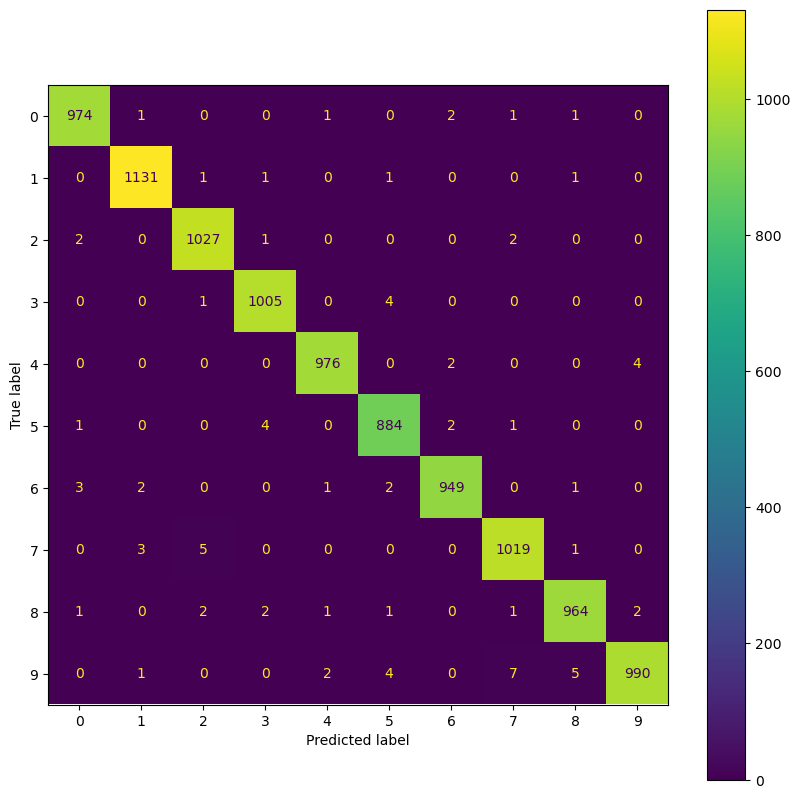

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay(cm).plot(ax=ax)
plt.show

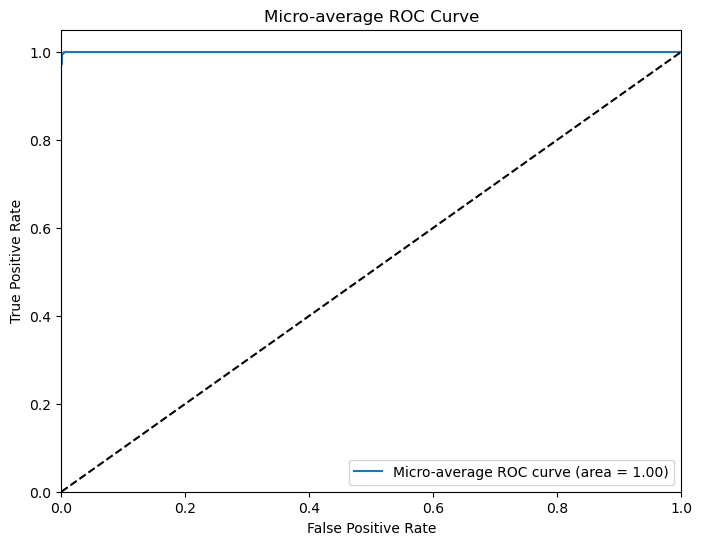

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# Binarizacja etykiet
y_true_binarized = label_binarize(y_true, classes=range(n_classes))

# Obliczenie krzywej ROC i AUC dla micro-average
fpr, tpr, _ = roc_curve(y_true_binarized.ravel(), y_pred_probs.ravel())
roc_auc = auc(fpr, tpr)

# Rysowanie krzywej ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curve')
plt.legend(loc="lower right")
plt.show()

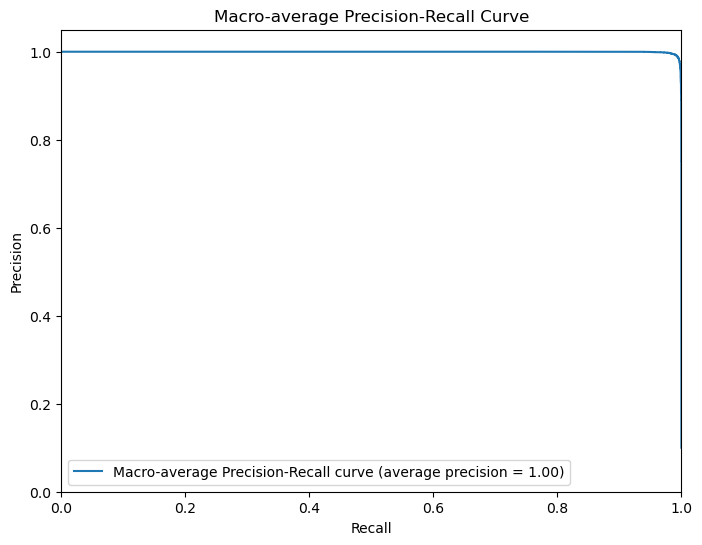

In [26]:
from helper_functions import calculate_and_plot_precision_recall_curve
calculate_and_plot_precision_recall_curve(y_true, y_pred_probs, n_classes)

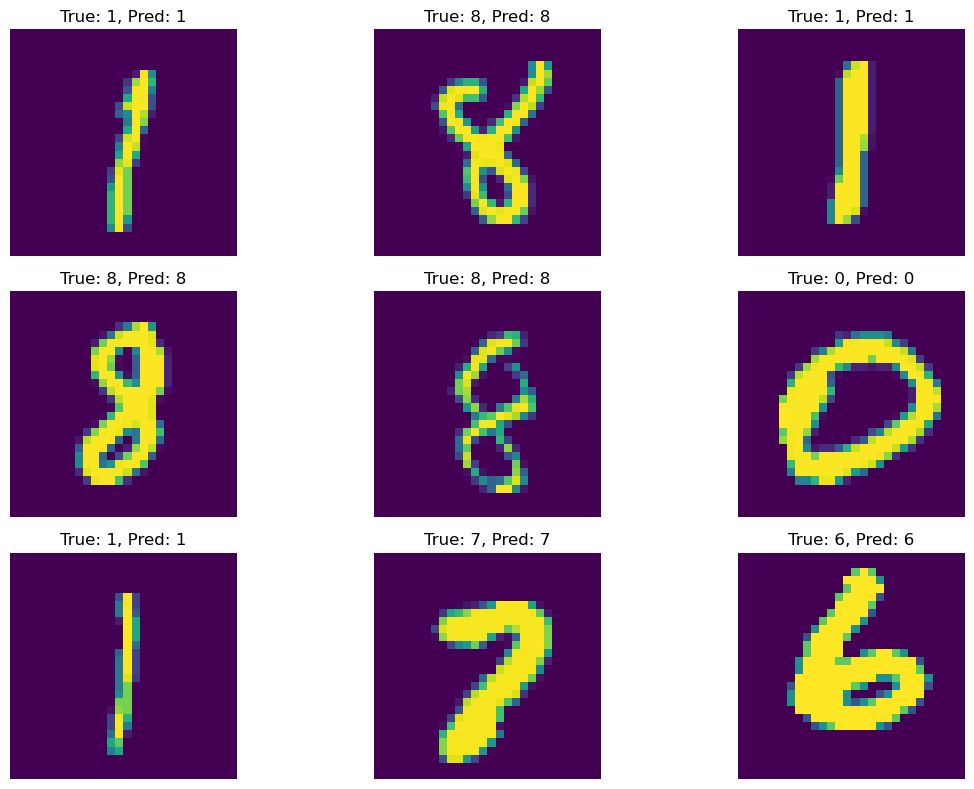

In [27]:
from helper_functions import display_random_images_with_predictions
display_random_images_with_predictions(test_dataset, y_true, y_pred_probs, total_images=9)

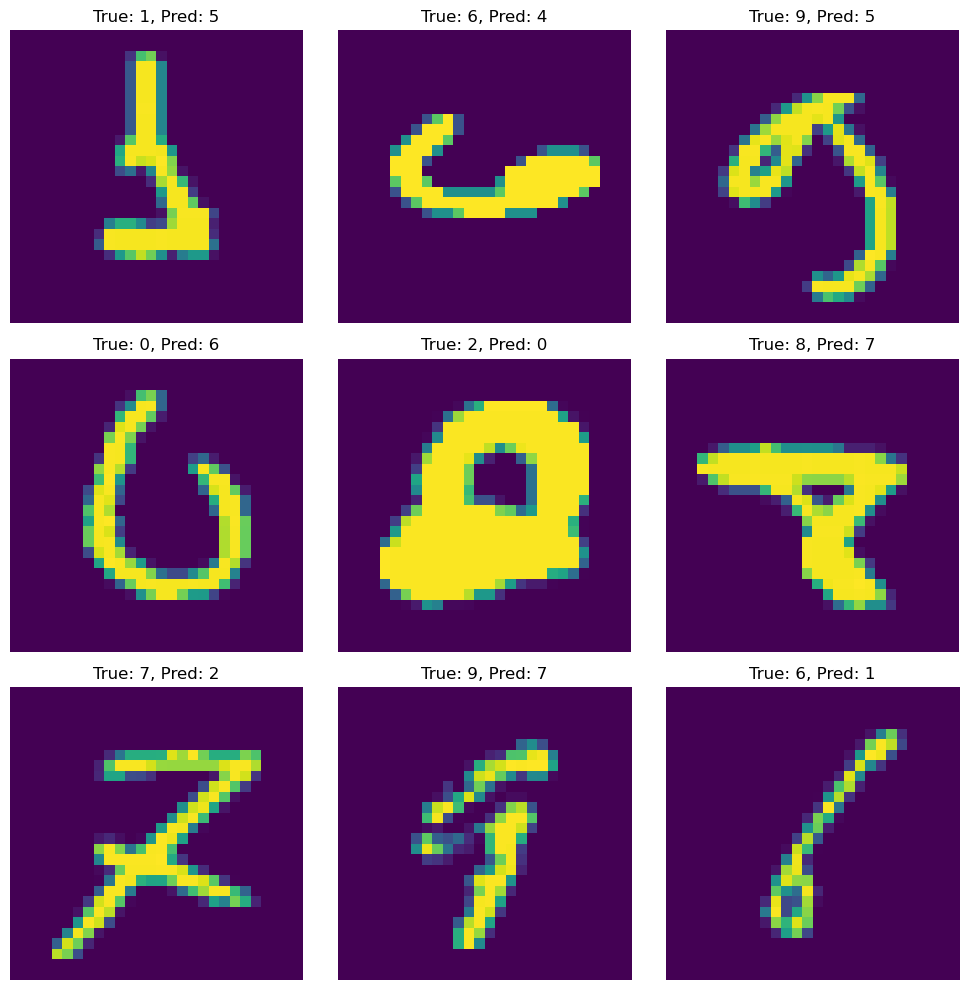

In [28]:
from helper_functions import display_misclassified_images
display_misclassified_images(test_dataset, y_true, y_pred, total_images=9)